# [1] torchvisionを使ってランダムにクロップされたデータを実装してください。
※ ここではGoogle Colaraboratoryでの実行を想定しています。

※ Google Colaraboratoryでbashコマンドを実行するには、命令の前に!をつけます。

## 【a】クロップ後の画像は、クロップされていない元の画像とどのように異なるのか確認してください

In [1]:
# 回答
# クロップ後の画像は引数で指定したサイズで元の画像からランダムに切り取られます(指定するサイズは元のサイズ以下にする)。
# したがって、元画像とはサイズと画像に写っている部分が異なります。
# ランダムクロップはtransforms.RandomCropを使用することで実現できます。
# transforms.RandomCropを用いると引数に指定したサイズで（例：サイズ24の場合は24×24の画像）が元の画像からランダムに切り取られた画像が得られます。

In [20]:
%matplotlib inline
from matplotlib import pyplot as plt
import numpy as np
import torch

from torchvision import datasets
from torchvision import transforms

In [74]:
torch.manual_seed(123)

In [21]:
# GitHubのリポジトリから実行の場合
data_path = "../data-unversioned/p1ch7/"

# Google Colaboratoryの場合
# /data/p1ch4/tabular-wine/winequality-white.csvを選択・アップロードしてください
#from google.colab import files
#uploade = files.upload()

In [22]:
cifar10 = datasets.CIFAR10(data_path, train=True, download=True) # <1>
cifar10_val = datasets.CIFAR10(data_path, train=False, download=True) # <2>

Files already downloaded and verified
Files already downloaded and verified


In [92]:
# 実行するたびに次のセルの実行結果がランダムに変わることが確認できます
transformed_cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transforms.RandomCrop(32))

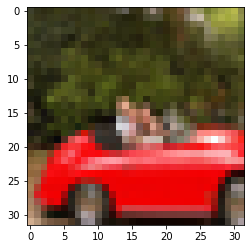

In [93]:
img_t, _ = transformed_cifar10[99]

plt.imshow(img_t)
plt.show()

## 【b】同じ画像を2回クロップするとどうなるか確認してください

In [ ]:
# 回答
# 1回目のcropで得られた画像から、さらにランダムに切り取られた画像が得られます。

In [56]:
random_crop = transforms.RandomCrop(16)
img_t = random_crop(img_t)

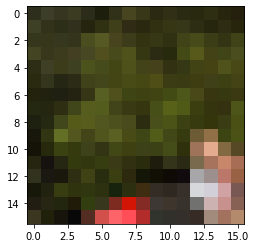

In [57]:
plt.imshow(img_t)
plt.show()

## 【c】ランダムにクロップされた画像を使った訓練結果を確認してください

In [ ]:
# 回答
# 今回のモデルの場合、cropした画像で訓練すると、精度は下がります。
# これは全結合のモデルではクロップによる画像の空間的変化を認識できないためです

In [133]:
crop_size = 30

transform_crop = transforms.Compose([
        transforms.RandomCrop(crop_size),
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ])

transform_no_crop = transforms.Compose([       
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ])


cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transform_no_crop)

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transform_no_crop)

In [134]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [135]:
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=64, shuffle=True)

In [130]:
import torch.nn as nn
import torch.optim as optim

input_size = crop_size * crop_size *3
#input_size = 3072 # cropなし

model = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 2))

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

Epoch: 0, Loss: 0.632668
Epoch: 1, Loss: 0.583662
Epoch: 2, Loss: 0.510644
Epoch: 3, Loss: 0.522492
Epoch: 4, Loss: 0.572710
Epoch: 5, Loss: 0.670232
Epoch: 6, Loss: 0.651678
Epoch: 7, Loss: 0.260835
Epoch: 8, Loss: 0.649594
Epoch: 9, Loss: 0.412848
Epoch: 10, Loss: 0.662059
Epoch: 11, Loss: 0.474887
Epoch: 12, Loss: 0.350090
Epoch: 13, Loss: 0.310838
Epoch: 14, Loss: 0.929018
Epoch: 15, Loss: 0.274175
Epoch: 16, Loss: 0.479683
Epoch: 17, Loss: 0.287188
Epoch: 18, Loss: 0.373591
Epoch: 19, Loss: 0.499466
Epoch: 20, Loss: 0.305920
Epoch: 21, Loss: 0.406155
Epoch: 22, Loss: 0.432189
Epoch: 23, Loss: 0.581197
Epoch: 24, Loss: 0.459233
Epoch: 25, Loss: 0.435899
Epoch: 26, Loss: 0.535097
Epoch: 27, Loss: 0.391015
Epoch: 28, Loss: 0.241818
Epoch: 29, Loss: 0.437882
Epoch: 30, Loss: 0.345004
Epoch: 31, Loss: 0.501271
Epoch: 32, Loss: 0.579021
Epoch: 33, Loss: 0.542437
Epoch: 34, Loss: 0.450785
Epoch: 35, Loss: 0.390124
Epoch: 36, Loss: 0.505412
Epoch: 37, Loss: 0.656195
Epoch: 38, Loss: 0.604

In [131]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.843300


In [132]:
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=64,
                                         shuffle=False)

correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))


Accuracy: 0.812000


# [2] 損失関数を切り替えてください（可能であればMSE）

## 【a】訓練の振る舞いが変わるか確認してください

In [ ]:
# 回答
# lossをMSEに変えた場合、訓練の振る舞いは変わります。
# 確率ではなくラベルを数値に見立て、回帰問題として学習しています

In [180]:
input_size = 3072 # cropなし

model = nn.Sequential(
            nn.Linear(input_size, 1024),
            nn.Tanh(),
            nn.Linear(1024, 512),
            nn.Tanh(),
            nn.Linear(512, 128),
            nn.Tanh(),
            nn.Linear(128, 1),
            )

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.MSELoss()

n_epochs = 100

for epoch in range(n_epochs):
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels.float())

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()

    print("Epoch: %d, Loss: %f" % (epoch, float(loss)))

/Users/goto/.anyenv/envs/pyenv/versions/3.7.4/lib/python3.7/site-packages/torch/nn/modules/loss.py:445: UserWarning: Using a target size (torch.Size([16])) that is different to the input size (torch.Size([16, 1])). This will likely lead to incorrect results due to broadcasting. Please ensure they have the same size.
  return F.mse_loss(input, target, reduction=self.reduction)


Epoch: 0, Loss: 0.399389
Epoch: 1, Loss: 0.308467
Epoch: 2, Loss: 0.251620
Epoch: 3, Loss: 0.250273
Epoch: 4, Loss: 0.242244
Epoch: 5, Loss: 0.253378
Epoch: 6, Loss: 0.247346
Epoch: 7, Loss: 0.256292
Epoch: 8, Loss: 0.250403
Epoch: 9, Loss: 0.239607
Epoch: 10, Loss: 0.247572
Epoch: 11, Loss: 0.257202
Epoch: 12, Loss: 0.248193
Epoch: 13, Loss: 0.251038
Epoch: 14, Loss: 0.250824
Epoch: 15, Loss: 0.253099
Epoch: 16, Loss: 0.253059
Epoch: 17, Loss: 0.249603
Epoch: 18, Loss: 0.252977
Epoch: 19, Loss: 0.250052
Epoch: 20, Loss: 0.250553
Epoch: 21, Loss: 0.251027
Epoch: 22, Loss: 0.250954
Epoch: 23, Loss: 0.253104
Epoch: 24, Loss: 0.250690
Epoch: 25, Loss: 0.250250
Epoch: 26, Loss: 0.250044
Epoch: 27, Loss: 0.250358
Epoch: 28, Loss: 0.250387
Epoch: 29, Loss: 0.250856
Epoch: 30, Loss: 0.252075
Epoch: 31, Loss: 0.249426
Epoch: 32, Loss: 0.250320
Epoch: 33, Loss: 0.250944
Epoch: 34, Loss: 0.250788
Epoch: 35, Loss: 0.247655
Epoch: 36, Loss: 0.248636
Epoch: 37, Loss: 0.251530
Epoch: 38, Loss: 0.249

In [177]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))        
        outputs[outputs > 0.5] = int(1)
        outputs[outputs < 0.5] = int(0)
        outputs = outputs.squeeze()     
        total += labels.shape[0]
        correct += int((outputs == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.606100


# [3] ネットワークの容量を十分に減らすことで、過学習を停止することは可能ですか？

## 【a】このとき、モデルは検証セットでどのように機能しますか？

In [ ]:
# 回答
# 隠れ層を1層減らし、ネットワークの大きさを縮小することで過学習の停止（抑制）は可能です
# この時、検証セットでの精度は過学習が抑制されたことにより、モデルを小さくする前より若干ですが改善します

In [198]:
transform_no_crop = transforms.Compose([       
        transforms.ToTensor(),
        transforms.Normalize((0.4915, 0.4823, 0.4468),
                             (0.2470, 0.2435, 0.2616))
    ])


cifar10 = datasets.CIFAR10(
    data_path, train=True, download=False,
    transform=transform_no_crop)

cifar10_val = datasets.CIFAR10(
    data_path, train=False, download=False,
    transform=transform_no_crop)

In [199]:
label_map = {0: 0, 2: 1}
class_names = ['airplane', 'bird']
cifar2 = [(img, label_map[label])
          for img, label in cifar10 
          if label in [0, 2]]
cifar2_val = [(img, label_map[label])
              for img, label in cifar10_val
              if label in [0, 2]]

In [200]:
batch_size = 64
train_loader = torch.utils.data.DataLoader(cifar2, batch_size=batch_size, shuffle=True)
val_loader = torch.utils.data.DataLoader(cifar2_val, batch_size=batch_size,shuffle=False)

In [222]:
input_size = 3072 # cropなし

# 元のモデル
# model = nn.Sequential(
#             nn.Linear(input_size, 1024),
#             nn.Tanh(),
#             nn.Linear(1024, 512),
#             nn.Tanh(),
#             nn.Linear(512, 128),
#             nn.Tanh(),
#             nn.Linear(128, 2),
#             )


model = nn.Sequential(
            nn.Linear(input_size, 256),            
            nn.Tanh(),
            nn.Linear(256, 64),
            nn.Tanh(),
            nn.Linear(64, 2))

learning_rate = 1e-3

optimizer = optim.SGD(model.parameters(), lr=learning_rate)

loss_fn = nn.CrossEntropyLoss()

n_epochs = 150


for epoch in range(n_epochs):
    train_loss = 0
    val_loss = 0
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        loss = loss_fn(outputs, labels)

        optimizer.zero_grad()
        loss.backward()
        optimizer.step()
        train_loss += loss.item()
    avg_train_loss = train_loss /len(train_loader)    

    with torch.no_grad():
        for imgs, labels in val_loader:
            outputs = model(imgs.view(imgs.shape[0], -1))
            loss = loss_fn(outputs, labels)
            val_loss += loss.item()
        avg_val_loss = val_loss / len(val_loader)
        
    if epoch % 10 == 0:
        print("Epoch: %d, train_loss: %f, val_loss: %f" % (epoch, avg_train_loss, avg_val_loss))

Epoch: 0, train_loss: 0.610557, val_loss: 0.566712
Epoch: 10, train_loss: 0.484836, val_loss: 0.479519
Epoch: 20, train_loss: 0.461390, val_loss: 0.460741
Epoch: 30, train_loss: 0.444578, val_loss: 0.448938
Epoch: 40, train_loss: 0.430208, val_loss: 0.440196
Epoch: 50, train_loss: 0.416957, val_loss: 0.435150
Epoch: 60, train_loss: 0.403863, val_loss: 0.439122
Epoch: 70, train_loss: 0.388677, val_loss: 0.427953
Epoch: 80, train_loss: 0.372876, val_loss: 0.423397
Epoch: 90, train_loss: 0.358055, val_loss: 0.428216
Epoch: 100, train_loss: 0.340593, val_loss: 0.421416
Epoch: 110, train_loss: 0.321357, val_loss: 0.447057
Epoch: 120, train_loss: 0.299042, val_loss: 0.425308
Epoch: 130, train_loss: 0.275910, val_loss: 0.429433
Epoch: 140, train_loss: 0.249123, val_loss: 0.437562


In [223]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in train_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.912400


In [224]:
correct = 0
total = 0

with torch.no_grad():
    for imgs, labels in val_loader:
        outputs = model(imgs.view(imgs.shape[0], -1))
        _, predicted = torch.max(outputs, dim=1)
        total += labels.shape[0]
        correct += int((predicted == labels).sum())
        
print("Accuracy: %f" % (correct / total))

Accuracy: 0.798500
